In [2]:
# Krok 0: wczytaj pandas
import pandas as pd

# Krok 1: wczytaj dane z pliku US_Baby_Names_right.csv
baby_names = pd.read_csv("US_Baby_Names_right.csv")

# Krok 2: przypisz dane do zmiennej baby_names. Zobacz jakiego typu dane są przechowywane i ile jest rekordów
print(baby_names.dtypes)
print(baby_names.shape)

# Krok 3: podejrzy pierwszych 10 rekordów ze zbioru
print(baby_names.head(10))

# Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id'
baby_names = baby_names.drop(columns=['Unnamed: 0', 'Id'])

# Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?
counts = baby_names['Gender'].value_counts()
if counts['F'] > counts['M']:
    print("Jest więcej kobiet")
else:
    print("jest więcej mężczyzn")

# Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.
name_counts = baby_names.groupby('Name').size().reset_index(name = 'Count')
top_names = name_counts.sort_values(by='Count', ascending=False).head(10)
print(top_names)


Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object
(1016395, 7)
   Unnamed: 0     Id      Name  Year Gender State  Count
0       11349  11350      Emma  2004      F    AK     62
1       11350  11351   Madison  2004      F    AK     48
2       11351  11352    Hannah  2004      F    AK     46
3       11352  11353     Grace  2004      F    AK     44
4       11353  11354     Emily  2004      F    AK     41
5       11354  11355   Abigail  2004      F    AK     37
6       11355  11356    Olivia  2004      F    AK     33
7       11356  11357  Isabella  2004      F    AK     30
8       11357  11358    Alyssa  2004      F    AK     29
9       11358  11359    Sophia  2004      F    AK     28
Jest więcej kobiet
         Name  Count
14062   Riley   1112
2174    Avery   1080
8500   Jordan   1073
13459  Peyton   1064
6584   Hayden   1049
15873  Taylor   1033
7892   Jayden   1031
778    Alexi

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ava'),
  Text(1, 0, 'Natalie'),
  Text(2, 0, 'Emily'),
  Text(3, 0, 'Emma'),
  Text(4, 0, 'Ella'),
  Text(5, 0, 'Madison'),
  Text(6, 0, 'Isabella'),
  Text(7, 0, 'Abigail'),
  Text(8, 0, 'Sophia'),
  Text(9, 0, 'Chloe')])

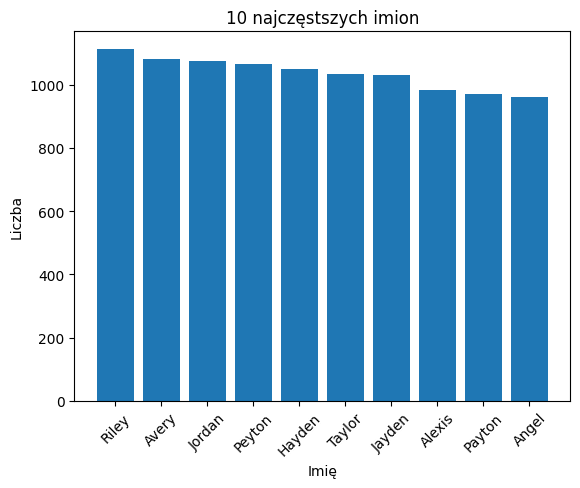

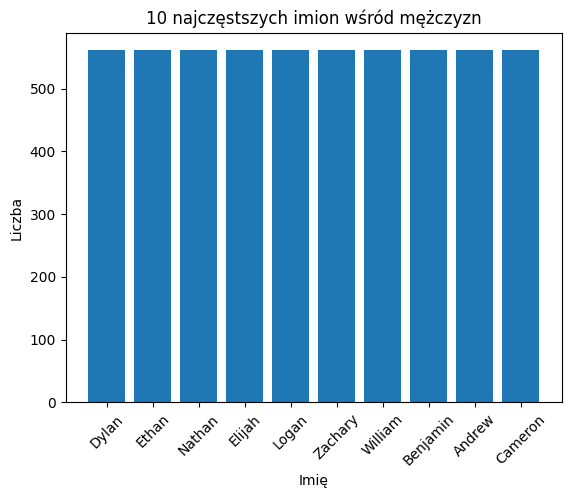

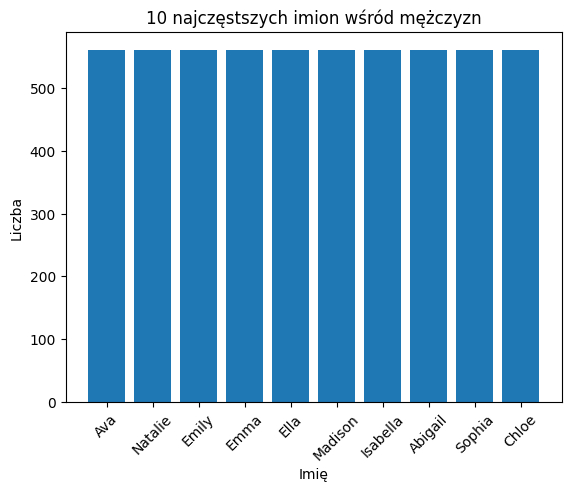

In [6]:
# Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z matplotlib. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.
import matplotlib.pyplot as plt

# Wykres ogółem
plt.figure()
plt.bar(top_names['Name'], top_names['Count'])
plt.title("10 najczęstszych imion")
plt.xlabel("Imię")
plt.ylabel("Liczba")
plt.xticks(rotation=45)

# Wykres dla mężczyzn
plt.figure()
male_names = baby_names[baby_names['Gender']=='M']
name_counts_male = male_names.groupby('Name').size().reset_index(name = 'Count')
top_names_male = name_counts_male.sort_values(by='Count', ascending=False).head(10)
plt.bar(top_names_male['Name'], top_names_male['Count'])
plt.title("10 najczęstszych imion wśród mężczyzn")
plt.xlabel("Imię")
plt.ylabel("Liczba")
plt.xticks(rotation=45)

# Wykres dla kobiet
plt.figure()
male_names = baby_names[baby_names['Gender']=='F']
name_counts_male = male_names.groupby('Name').size().reset_index(name = 'Count')
top_names_male = name_counts_male.sort_values(by='Count', ascending=False).head(10)
plt.bar(top_names_male['Name'], top_names_male['Count'])
plt.title("10 najczęstszych imion wśród mężczyzn")
plt.xlabel("Imię")
plt.ylabel("Liczba")
plt.xticks(rotation=45)

In [10]:
# Krok 8: Jak wiele różnych imion występuje w zbiorze?
num_unique_names = baby_names['Name'].nunique()
print(f"W zbiorze występuje {num_unique_names} różnych imion.")

# Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku
import random

def generate_name():
    total_count = baby_names['Name'].count()
    random_index = random.randint(0, total_count - 1)
    return baby_names.iloc[random_index]['Name']

# Krok 10: Jakie imie występuje najczęściej?
top_name = name_counts.sort_values(by='Count', ascending=False).iloc[0]['Name']
print(f"Najczęściej występujące imię to {top_name}.")

# Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.
mean = name_counts['Count'].mean()
median = name_counts['Count'].median()
std = name_counts['Count'].std()
print(f"Średnia liczba wystąpień imienia w zbiorze: {mean}")
print(f"Mediana liczby wystąpień imienia w zbiorze: {median}")
print(f"Odchylenie standardowe liczby wystąpień imienia w zbiorze: {std}")

W zbiorze występuje 17632 różnych imion.
Najczęściej występujące imię to Riley.
Średnia liczba wystąpień imienia w zbiorze: 57.644906987295826
Mediana liczby wystąpień imienia w zbiorze: 8.0
Odchylenie standardowe liczby wystąpień imienia w zbiorze: 122.0299635081389
